In [1]:
# pip install bitarray 
from bitarray import bitarray

import logging
# Configuring logging
logging.basicConfig(
    filename= 'logging_info.txt',
    level=logging.INFO, 
    format='%(asctime)s - %(levelname)s - %(message)s',
    )


# pip install mmh3  --> for murmur hash function
import mmh3
import math  
import matplotlib.pyplot as plt

In [2]:
# import input_taker  
from input_taker import *
# from input_taker import input_taking_with_different_no_of_hash
from ip_generator import *

from plotter import *

# BloomFilter Class

In [3]:
# bloom filter class
class BloomFilter:
    logging.info("Executing Bloom filter Class...... ")
    def __init__(self, size, no_of_hash, multiplier):
        self.size = size
        self.multiplier = multiplier
        self.m = int(self.size * multiplier)
        self.filter = bitarray(self.m)
        self.filter.setall(0) 
        self.no_of_hash = no_of_hash
        self.seeds = [i * 31 + 7 for i in range(no_of_hash)] # prime no helps to take a good seed value for better distribution


    def add(self, ip):
        for i in range(0,self.no_of_hash):
            hash_value = mmh3.hash(ip, seed=self.seeds[i]) & 0x7FFFFFFF  # Ensures positive hash values
            self.filter[hash_value % self.m] = True




    def exists(self, ip):
        for i in range(self.no_of_hash):
            hash_value = mmh3.hash(ip, seed=self.seeds[i]) & 0x7FFFFFFF 
            if not self.filter[hash_value % self.m]:
                return False
        return True

<span style="background-color:rgb(235, 235, 235); padding: 6px; font-size: 30px; font-weight: bold;">Main Method is in last section..</span> 

<span style="background-color: lightgrey; padding: 6px; font-size: 27px; font-weight: bold;">false_positive &nbsp; V/S &nbsp; no_of_hash_used</span>

In [5]:
def type1():
    sz, no_of_hash, multiplier = input_taking_with_different_no_of_hash()
    logging.info("IP Address file generation for 2nd type input starts...... ")
    generate_ip_file("ip_addresses.txt", sz)
    logging.info("IP Address file generation for 2nd type input completed...... ")

    ip_addresses = read_ip_file("ip_addresses.txt")
    false_positives = []


    for i in range(2,no_of_hash+1):
        filter_bloom1 = BloomFilter(int(sz/2), i, multiplier)   # sz/2 as we are training with half of the data only ..
        trained_cnt = 0
        for ip in ip_addresses[:len(ip_addresses) // 2]:  
            filter_bloom1.add(ip)
            trained_cnt += 1

        
        cnt_true = 0 # will count no of true bloom filter is saying 
        for ip in ip_addresses:
            if filter_bloom1.exists(ip) == True:
                cnt_true += 1
        
        
        false_positive = 0

        if len(ip_addresses) != trained_cnt:
            false_positive = (cnt_true - trained_cnt)*100 / (len(ip_addresses) - trained_cnt)

        false_positives.append(false_positive)

    plotGraph(no_of_hash, false_positives, sz, multiplier)


### Will use this particular formula......
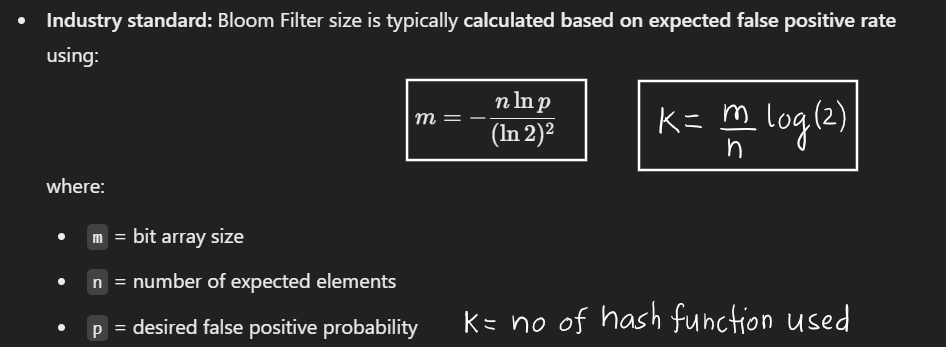

### Here We are just taking input for the size of IP_Addresses Array not taking false_positive_rate as 5% 

In [6]:
def type2():
    logging.info("Trying to execute code part where it take size of ip_add array only false_positive_rate by default 5% ")
    sz = int(input("Enter size for IP address array: "))

    logging.info("IP Address file generation for 3rd type input starts...... ")
    generate_ip_file("ip_addresses.txt", sz)
    logging.info("IP Address file generation for 3rd type input completed...... ")


    ip_addresses = read_ip_file("ip_addresses.txt")
    false_positives = []

    print("Taking Expected false positive rate as 5 % ");
    logging.info("Taking Expected false positive rate as 5 % ");
    # I have taken value of m as n * multiplier --> so multiplier is equal to   - log(p) / (ln(2)*ln(2))
    multiplier = 6.23
    print("So according to formula it comes out to be 6.23 * size_of_IP_array")
    logging.info("So according to formula it comes out to be 6.23 * size_of_IP_array")

    # Now it's turn for value of no_of_hash_used
    no_of_hash = 6.23 * 0.6931


    print(f"According to formula no_of_hash must be either {math.floor(no_of_hash)} or {math.ceil(no_of_hash)}; let's see through graph as well.")
    logging.info(f"According to formula no_of_hash must be either {math.floor(no_of_hash)} or {math.ceil(no_of_hash)}; let's see through graph as well.")


    no_of_hash = int(no_of_hash + 5)
    for i in range(2,no_of_hash+1):
        filter_bloom1 = BloomFilter(int(sz/2), i, multiplier)
        trained_cnt = 0
        for ip in ip_addresses[:len(ip_addresses) // 2]:  
            filter_bloom1.add(ip)
            trained_cnt += 1

        
        cnt_true = 0 # will count no of true bloom filter is saying 
        for ip in ip_addresses:
            if filter_bloom1.exists(ip) == True:
                cnt_true += 1
        
        
        false_positive = 0

        if len(ip_addresses) != trained_cnt:
            false_positive = (cnt_true - trained_cnt)*100 / (len(ip_addresses) - trained_cnt)

        false_positives.append(false_positive)

    plotGraph(no_of_hash, false_positives, sz, multiplier)


### Here We are taking Size of the IP_addresses Array as well as expected false_positive_rate like 5% or 7.5%

In [7]:
def type3():
    logging.info("Trying to execute code part where it take size of ip_add array and expected false_positive_rate in percentage...")
    sz = int(input("Enter size for IP address array: "))
    logging.info("IP Address file generation for 4th type input starts...... ")
    generate_ip_file("ip_addresses.txt", sz)
    logging.info("IP Address file generation for 4th type input completed...... ")
    ip_addresses = read_ip_file("ip_addresses.txt")
    false_positives = []

    # false_positives_input
    false_positives_input = float(input("Enter expected false positive rates like 5 or 7.5: "))

    # I have taken value of m as n * multiplier --> so multiplier is equal to   - log(false_positives_input) / (ln(2)*ln(2))
    # Calculating multiplier
    multiplier = -math.log(false_positives_input/100) / (math.log(2) ** 2)
    print(f"So according to formula size of bitset array comes out to be {multiplier:.2f} time of size_of_IP_array")
    logging.info(f"So according to formula size of bitset array comes out to be {multiplier:.2f} time of size_of_IP_array")

    # Now it's turn for value of no_of_hash_used
    no_of_hash = multiplier * 0.6931


    print(f"According to formula no_of_hash must be either {math.floor(no_of_hash)} or {math.ceil(no_of_hash)}; let's see through graph as well.")
    logging.info(f"According to formula no_of_hash must be either {math.floor(no_of_hash)} or {math.ceil(no_of_hash)}; let's see through graph as well.")

    no_of_hash = int(no_of_hash + 5)   # increasing it's value for plotting purpose...




    for i in range(2,no_of_hash+1):
        filter_bloom1 = BloomFilter(int(sz/2), i, multiplier)
        trained_cnt = 0
        for ip in ip_addresses[:len(ip_addresses) // 2]:  
            filter_bloom1.add(ip)
            trained_cnt += 1

        
        cnt_true = 0 # will count no of true bloom filter is saying 
        for ip in ip_addresses:
            if filter_bloom1.exists(ip) == True:
                cnt_true += 1
        
        false_positive = 0

        if len(ip_addresses) != trained_cnt:
            false_positive = (cnt_true - trained_cnt)*100 / (len(ip_addresses) - trained_cnt)

        false_positives.append(false_positive)

    plotGraph(no_of_hash, false_positives, sz, multiplier)


# MAIN FUNCTION

Value Entered >>> Size of array: 10000, Number of hash functions: 5, Multiplier: 7
False positive rate: 0.30%
Result of type1() function: 


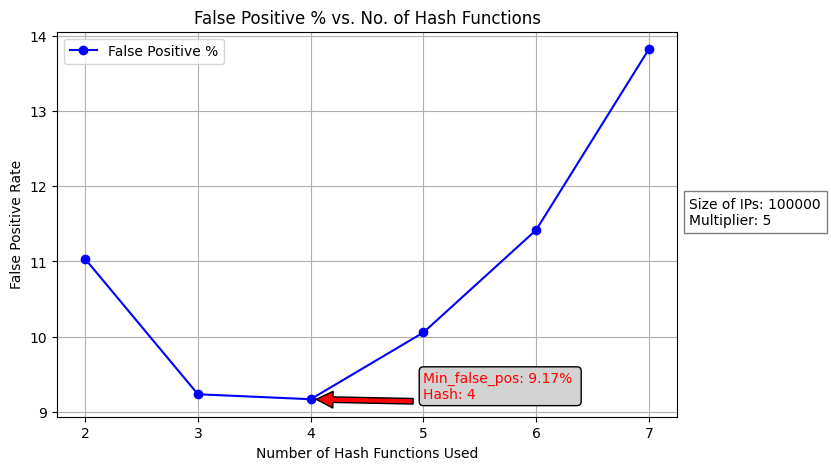

Result of type1() function: 
Taking Expected false positive rate as 5 % 
So according to formula it comes out to be 6.23 * size_of_IP_array
According to formula no_of_hash must be either 4 or 5; let's see through graph as well.


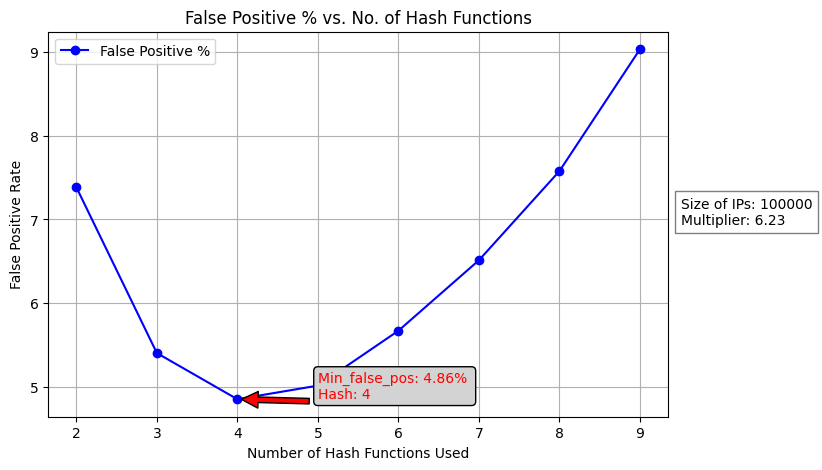

Result of type1() function: 
So according to formula size of bitset array comes out to be 6.98 time of size_of_IP_array
According to formula no_of_hash must be either 4 or 5; let's see through graph as well.


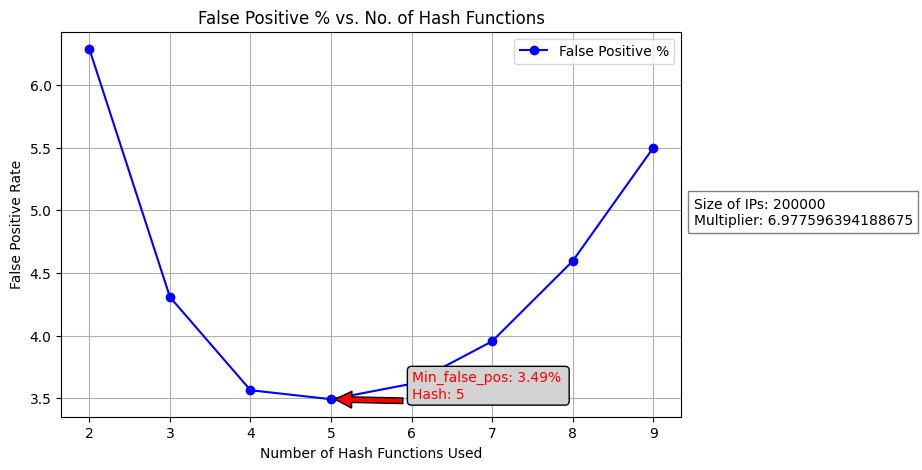

In [8]:
if __name__ == "__main__":
    logging.info("Executing Main method...... ")
    #input taking 
    sz, no_of_hash, multiplier = inputTaking()
    # Generate a file named "ip_addresses.txt" with sz no of random IPs
    logging.info("IP Address file for main method generation starts...... ")
    generate_ip_file("ip_addresses.txt", sz)
    logging.info("IP Address file for main method generation completed...... ")

    if sz <= 0:
        logging.warning("Negative size of array not possible changing it in positive.. ")
        sz = sz * (-1) + 1  #changing -ve to positive and adding + 1 for zero sz case
         
    logging.info(f"Value Entered >>> Size of array: {sz}, Number of hash functions: {no_of_hash}, Multiplier: {multiplier}")
    print(f"Value Entered >>> Size of array: {sz}, Number of hash functions: {no_of_hash}, Multiplier: {multiplier}")
    
    
    filter_bloom1 = BloomFilter(sz, no_of_hash, multiplier)

    # Reading IP addresses from file "ip_addresses.txt"
    ip_addresses = read_ip_file("ip_addresses.txt")

    # adding first half of the IP addresses in the bloom filter then check for all 
    trained_cnt = 0
    for ip in ip_addresses[:len(ip_addresses) // 2]:  
        filter_bloom1.add(ip)
        trained_cnt += 1

    
    cnt_true = 0 # will count no of true bloom filter is saying 
    for ip in ip_addresses:
        if filter_bloom1.exists(ip) == True:
            cnt_true += 1
    
    false_positive = 0
    if len(ip_addresses) != trained_cnt:
        false_positive = (cnt_true - trained_cnt) / (len(ip_addresses) - trained_cnt)

    logging.info(f"False positive rate: {false_positive:.2%}")
    print(f"False positive rate: {false_positive:.2%}")

    logging.info("Calling type 1 where it need n,k,multliplier everything : ")
    print("Result of type1() function: ")
    type1()

    logging.info("Calling type 2 where it need n only: ")
    print("Result of type1() function: ")
    type2()
    logging.info("Calling type 3 where it need n and expected false_positive_rate: ")
    print("Result of type1() function: ")
    type3()

